# Decision Tree Analysis with Python

Mayu Nihei - June 2019

## お茶の好みに関する決定木分析

今回の目的変数となるお茶の種類は5種類です。

それぞれのお茶の好みにどの要素が影響を与えているのかを決定木分析することを目的としたものです。

In [2]:
#ライブラリの読み込み
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from datetime import datetime
import calendar
from subprocess import call
from sklearn.metrics import mean_squared_log_error

## 説明変数について

In [3]:
train = pd.read_csv("./houji.csv", low_memory=False)
train = train.dropna(how='any')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 185
Data columns (total 70 columns):
チケット番号          181 non-null float64
性別              181 non-null float64
年代              181 non-null float64
和食              181 non-null float64
洋食              181 non-null float64
中華              181 non-null float64
コーヒー            181 non-null float64
紅茶              181 non-null float64
お茶              181 non-null float64
水               181 non-null float64
ジュース            181 non-null float64
スポーツ飲料          181 non-null float64
酒               181 non-null float64
緑茶              181 non-null float64
麦茶              181 non-null float64
ビール             181 non-null float64
ワイン             181 non-null float64
日本酒             181 non-null float64
焼酎              181 non-null float64
ウイスキー           181 non-null float64
カクテル            181 non-null float64
お酒は苦手           181 non-null float64
梅酒              181 non-null float64
甘い              181 non-null float64
しょっぱい  

全て２値変数です。<br>
金額は、外食の予算にどのくらいかけるかについて。<br>
毎日~全くしないは、スポーツの頻度について。<br>
よく利用する~利用したことがないは、ネットショッピングを利用する頻度について。<br>
食事~その他は、何にお金をかけたいかについて。<br>
Yesの回答は1、Noの回答は0としています。

## ほうじ茶好みの決定木

In [12]:
train = pd.read_csv("./houji.csv", low_memory=False)
train = train.dropna(how='any')

In [13]:
X_train = train.drop(["好きほうじ"], axis=1)
X_train = X_train.drop(["チケット番号"],axis=1)
y_train = train["好きほうじ"]

In [14]:
#決定木のパラメータを設定
params = {
    'criterion': 'mse', 
    'max_features': 'auto',
    'max_depth': 2, 
    'max_leaf_nodes': None,
}

In [15]:
#決定木の作成
model = DecisionTreeRegressor(**params)
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

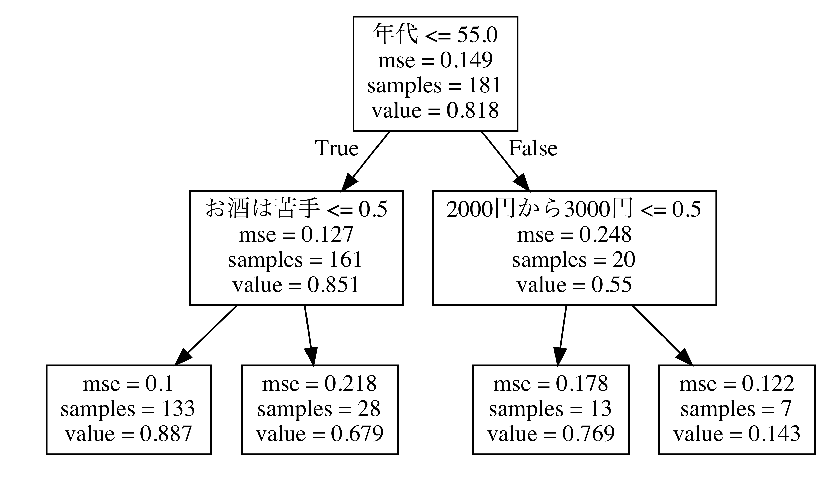

In [16]:
#Tree図を出力
export_graphviz(model, out_file='tree.dot', 
                feature_names = X_train.columns)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

In [17]:
#交差検証を行った時のRMSLE
scores = np.abs(cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_log_error'))
print('Validation RMSLE: {}'.format(np.mean(scores)))

Validation RMSLE: 0.07887767109959526


## 煎茶好みの決定木

In [18]:
train = pd.read_csv("./sencha.csv", low_memory=False)
train = train.dropna(how='any')

In [19]:
X_train = train.drop(["好き煎茶"], axis=1)
X_train = X_train.drop(["チケット番号"],axis=1)
y_train = train["好き煎茶"]

In [20]:
#決定木のパラメータを設定
params = {
    'criterion': 'mse', 
    'max_features': 'auto',
    'max_depth': 2, 
    'max_leaf_nodes': None,
}

In [21]:
#決定木の作成
model = DecisionTreeRegressor(**params)
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

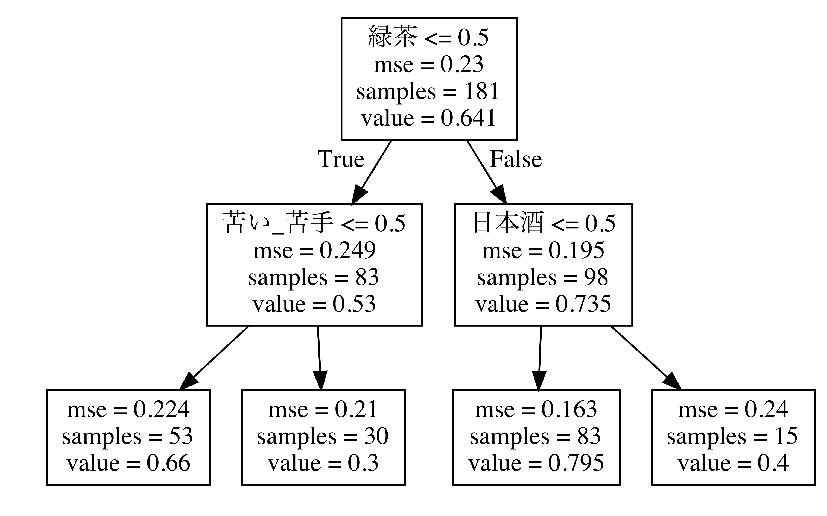

In [22]:
#Tree図を出力
export_graphviz(model, out_file='tree.dot', 
                feature_names = X_train.columns)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

In [23]:
#交差検証を行った時のRMSLE
scores = np.abs(cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_log_error'))
print('Validation RMSLE: {}'.format(np.mean(scores)))

Validation RMSLE: 0.11178522928962567


## 新茶好みの決定木

In [28]:
train = pd.read_csv("./shincha.csv", low_memory=False)
train = train.dropna(how='any')

In [29]:
X_train = train.drop(["好き新茶"], axis=1)
X_train = X_train.drop(["チケット番号"],axis=1)
y_train = train["好き新茶"]

In [30]:
#決定木のパラメータを設定
params = {
    'criterion': 'mse', 
    'max_features': 'auto',
    'max_depth': 2, 
    'max_leaf_nodes': None,
}

In [31]:
#決定木の作成
model = DecisionTreeRegressor(**params)
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

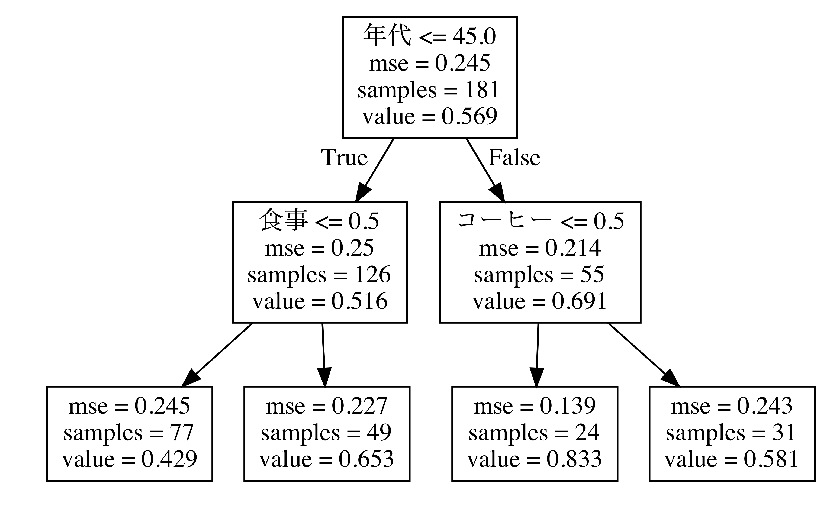

In [32]:
#Tree図を出力
export_graphviz(model, out_file='tree.dot', 
                feature_names = X_train.columns)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

In [33]:
#交差検証を行った時のRMSLE
scores = np.abs(cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_log_error'))
print('Validation RMSLE: {}'.format(np.mean(scores)))

Validation RMSLE: 0.14776085942679346


## 抹茶好みの決定木

In [34]:
train = pd.read_csv("./maccha.csv", low_memory=False)
train = train.dropna(how='any')

In [35]:
X_train = train.drop(["好き抹茶"], axis=1)
X_train = X_train.drop(["チケット番号"],axis=1)
y_train = train["好き抹茶"]

In [36]:
#決定木のパラメータを設定
params = {
    'criterion': 'mse', 
    'max_features': 'auto',
    'max_depth': 2, 
    'max_leaf_nodes': None,
}

In [37]:
#決定木の作成
model = DecisionTreeRegressor(**params)
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

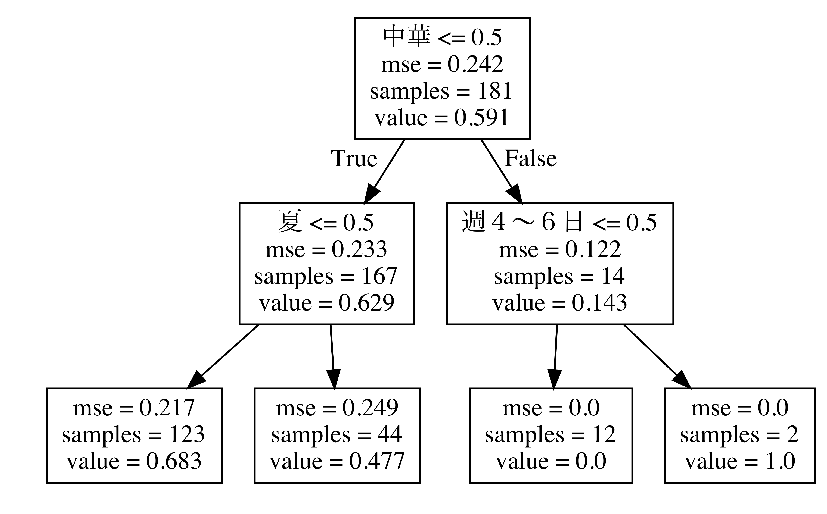

In [38]:
#Tree図を出力
export_graphviz(model, out_file='tree.dot', 
                feature_names = X_train.columns)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

In [39]:
#交差検証を行った時のRMSLE
scores = np.abs(cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_log_error'))
print('Validation RMSLE: {}'.format(np.mean(scores)))

Validation RMSLE: 0.11585388660851328


## 玄米茶の好みの決定木

In [40]:
train = pd.read_csv("./genmaicha.csv", low_memory=False)
train = train.dropna(how='any')

In [41]:
X_train = train.drop(["好き玄米"], axis=1)
X_train = X_train.drop(["チケット番号"],axis=1)
y_train = train["好き玄米"]

In [42]:
#決定木のパラメータを設定
params = {
    'criterion': 'mse', 
    'max_features': 'auto',
    'max_depth': 2, 
    'max_leaf_nodes': None,
}

In [43]:
#決定木の作成
model = DecisionTreeRegressor(**params)
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

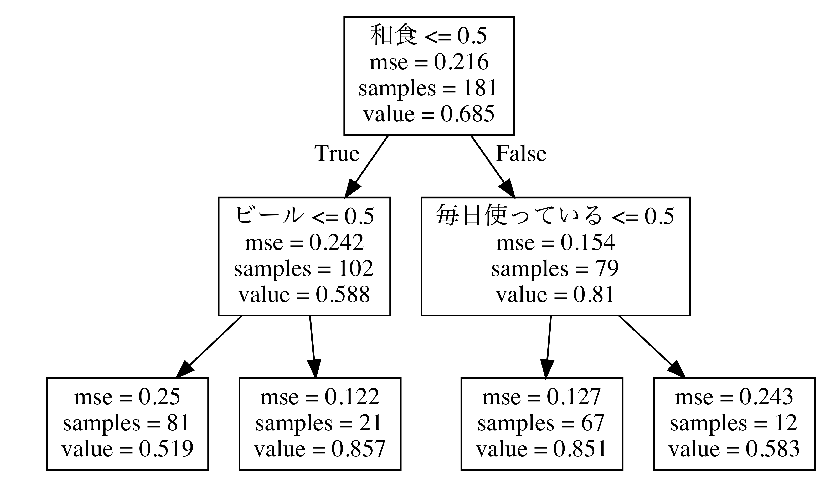

In [44]:
#Tree図を出力
export_graphviz(model, out_file='tree.dot', 
                feature_names = X_train.columns)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

In [45]:
#交差検証を行った時のRMSLE
scores = np.abs(cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_log_error'))
print('Validation RMSLE: {}'.format(np.mean(scores)))

Validation RMSLE: 0.11098598268123687
